In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Set plotting style
sns.set(style='whitegrid')
%matplotlib inline # Ensures that plots are displayed inline in Jupyter notebooks


In [ ]:
# Load dataset
df = pd.read_csv("hour.csv") # Adjust the path as necessary

In [4]:
# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (17379, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [5]:
# Preview data
display(df.head())
display(df.tail())


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
# Check for missing values
# Check which columns in a DataFrame (df) have missing (null) values, and display them sorted from most to least missing.
missing = df.isnull().sum() # creates a DataFrame of the same shape, where each cell is: True if the original value is NaN (missing), False otherwise. 
# Then, it sums the True values (which are treated as 1) for each column.
missing = missing[missing > 0].sort_values(ascending=False) # Sorts the columns by the number of missing values in descending order. Keeps only those columns that have missing values (i.e., where the sum is greater than 0).
print("\nMissing values:")
print(missing)



Missing values:
Series([], dtype: int64)


The above result is what we expected given what we got when we ran info. There aare no missing values.

In [ ]:
# Descriptive statistics for true numeric columns

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
display(df[numeric_cols].describe().round(3)) # Round to 3 decimal places for better readability



,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,1.000,1.000,1.000,0.851,367.000,886.000,977.000


In [ ]:
### For categorical columns

#cat_columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

#for col in cat_columns:
    #print(f"\n{col} value counts:")
    #print(df[col].value_counts())

# NOT USEFUL LIKE THIS

In [ ]:
# Check for unique values

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


instant: 17379 unique values
dteday: 731 unique values
season: 4 unique values
yr: 2 unique values
mnth: 12 unique values
hr: 24 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weathersit: 4 unique values
temp: 50 unique values
atemp: 65 unique values
hum: 89 unique values
windspeed: 30 unique values
casual: 322 unique values
registered: 776 unique values
cnt: 869 unique values


In [16]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
# This should be zero, the first column is an index 


Duplicate rows: 0


In [19]:
# Check for duplicates excluding 'instant' column
duplicates = df.drop(columns='instant').duplicated()

# Display all duplicated rows
df[duplicates]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


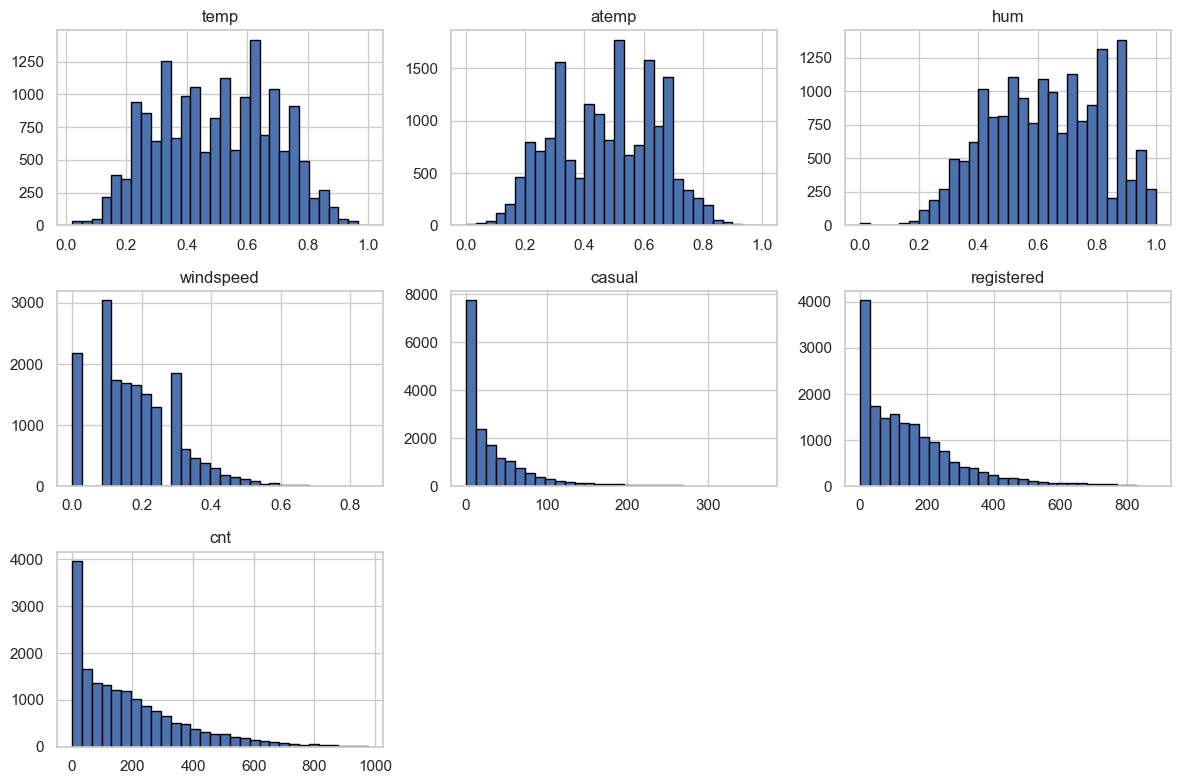

In [24]:
# Histograms for true numeric columns

import matplotlib.pyplot as plt

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot histograms
df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor='black') # Adjust the number of bins as needed
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()





/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


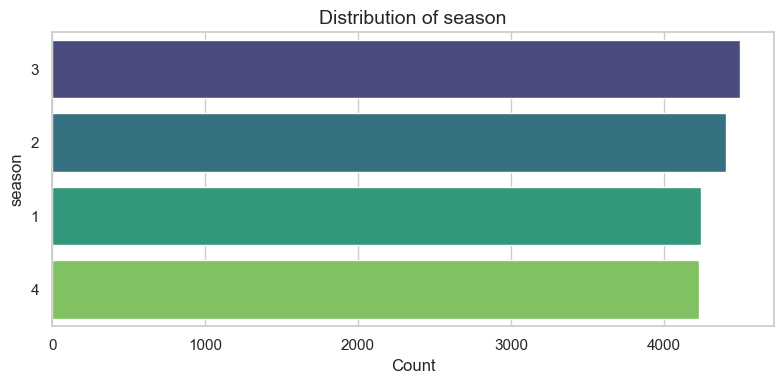

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


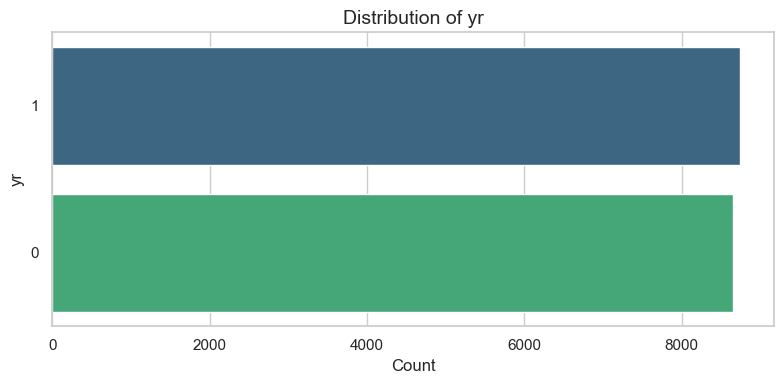

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


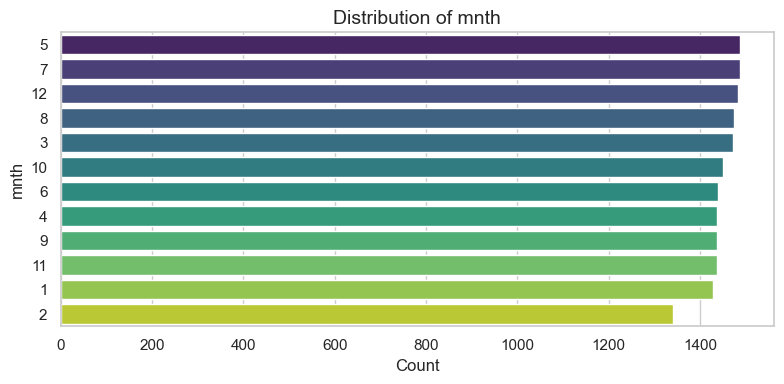

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


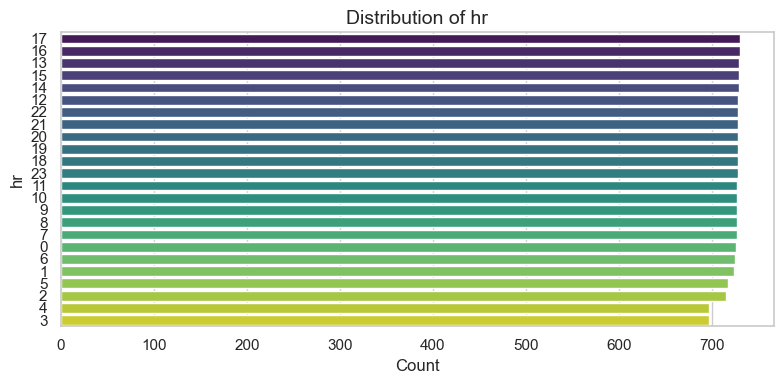

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


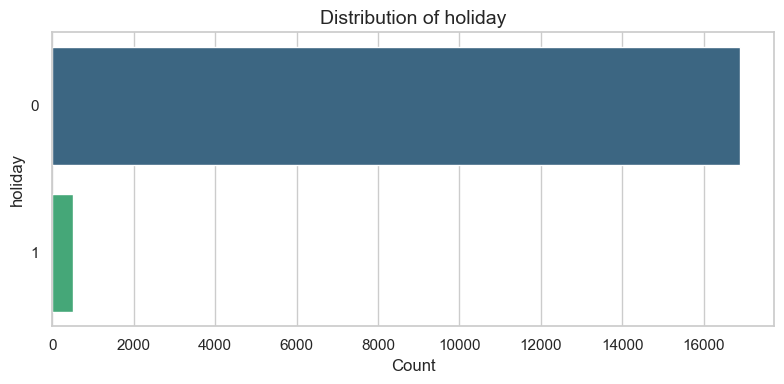

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


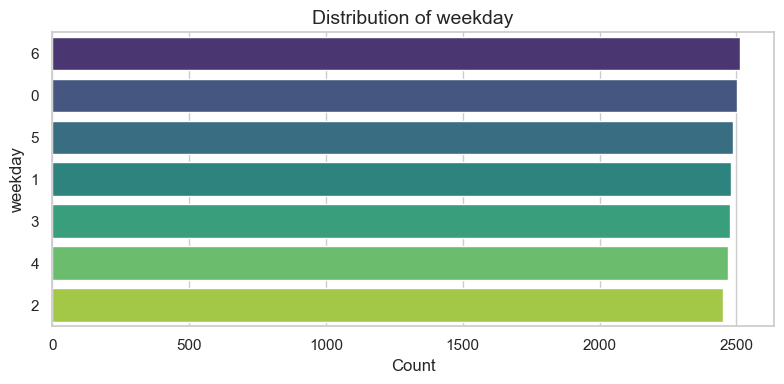

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


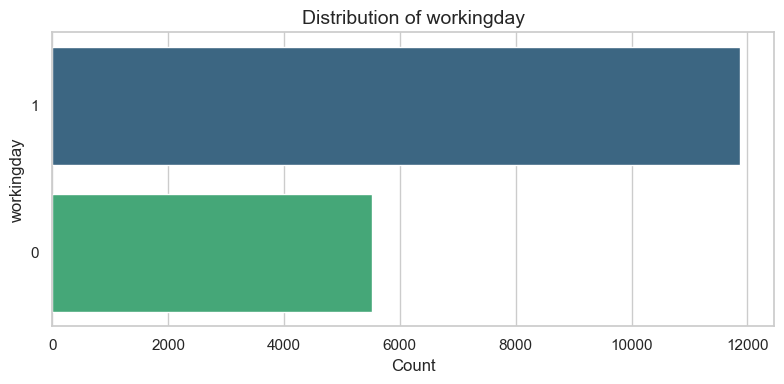

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_10408/2476178386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


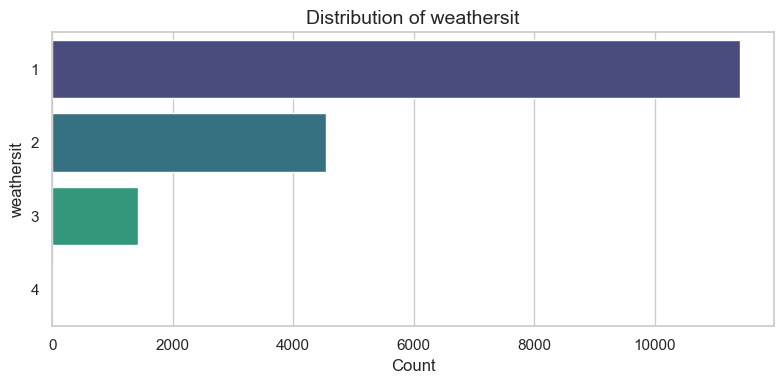

In [ ]:
# Count plots for categorical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Define your categorical columns (either object or numeric-as-category)
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Loop through each and plot
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# We might want to keep only the most relevant plots of categorical columns for further analysis. 
# Some of the plots seem unbalanced, this might be related to the fact that the data is already clean, so some unpopular hours, for example,  that produced no rentals, are not represented in the dataset.

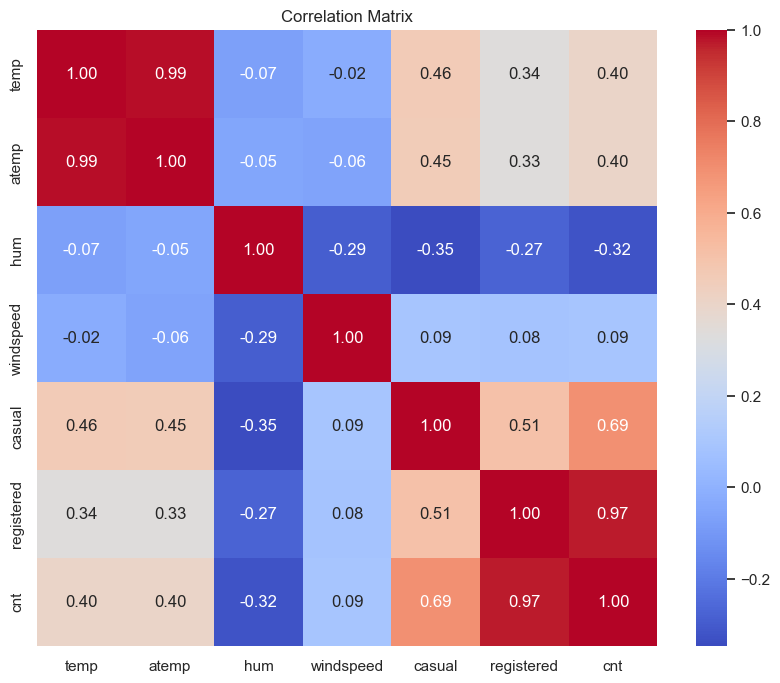

In [29]:
# Correlation heatmap for true numeric features

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(10,8)) # Create a figure with a specified size
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# df.[numeric_cols].corr() Computes the correlation matrix of all true numeric columns in the DataFrame
# annot=True: shows the correlation coefficients inside each square.
# cmap='coolwarm': uses the coolwarm color palette, where:
# Blue = negative correlation
# Red = positive correlation
# fmt=".2f": formats the annotations with 2 decimal places

plt.title("Correlation Matrix")
plt.show()



It is important to remember:

Correlation ≠ Causation: A strong correlation doesn't mean one variable causes the other.

Outliers and non-linear relationships might distort correlation values.

Multicollinearity: If two variables are too highly correlated (like temp and atemp), we may want to drop one in modeling.

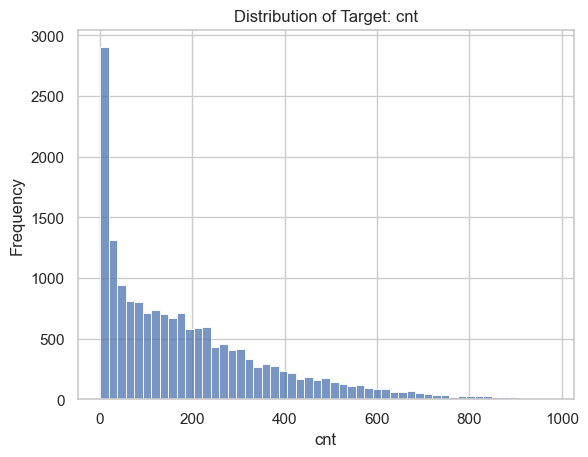

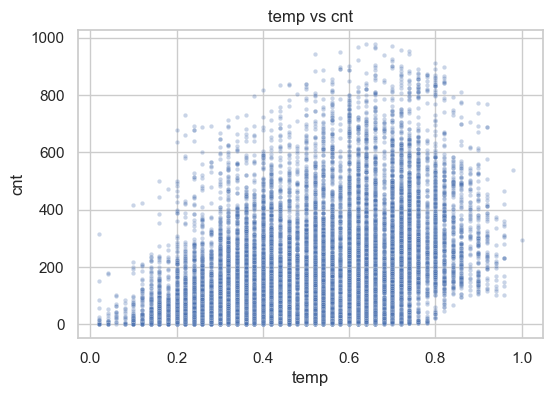

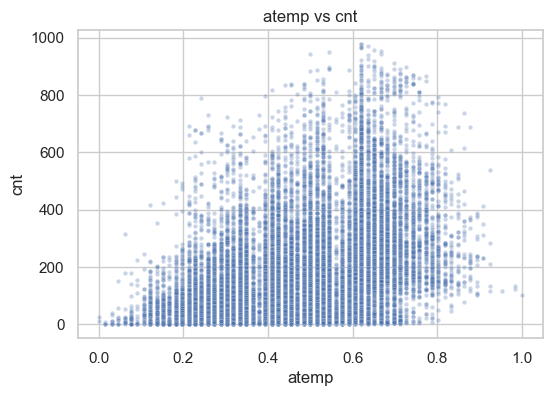

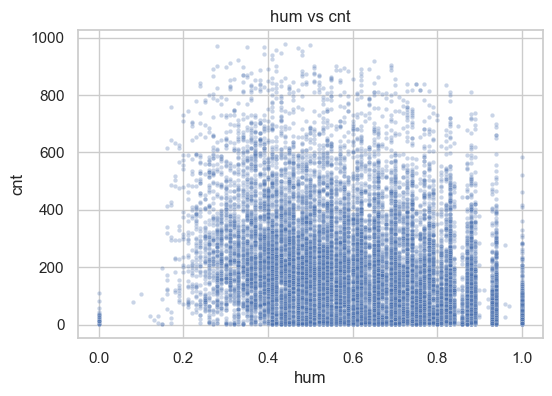

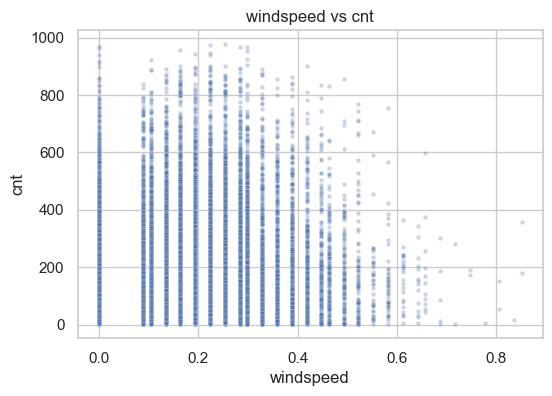

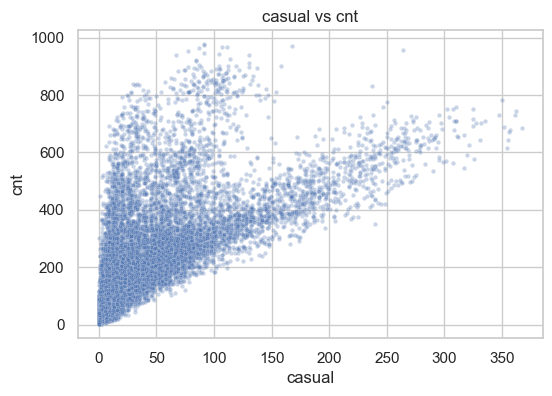

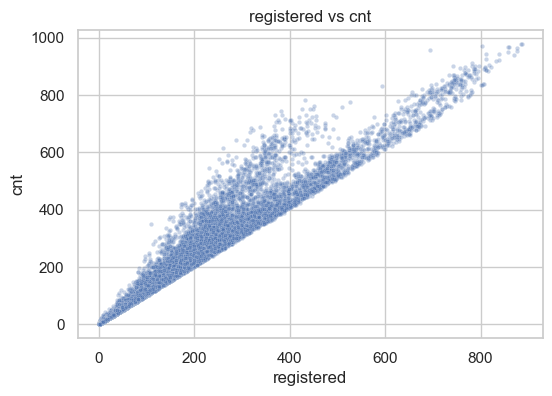

In [35]:
# Distribution of the target variable and its relationship with other numeric features

# Selected numeric columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
target = 'cnt' # The target variable we want to analyze

# Distribution of the target variable
sns.histplot(df[target]) 
# Draw a histogram of the data in df[target] (a bar chart of frequency counts)

plt.title(f'Distribution of Target: {target}')
plt.xlabel(target)
plt.ylabel("Frequency")
plt.show()

# Relationship with other numeric features
num_features = [col for col in numeric_cols if col != target]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y=target, data=df, alpha=0.3, s=10)  # alpha=0.3 makes points more transparent, s=10 sets the size of the points
    plt.title(f'{col} vs {target}')
    plt.show()

